In [6]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
import os
import numpy as np
import librosa
import wave
import pylab
import matplotlib.pyplot as plt



import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Load speech file
speech_file = '/Users/akshatsaxena/Desktop/BTP_VAD/BTP!/TRAIN/CLEAN/'


# Compute spectrogram for each window segment
spectrograms = []
label_file = '/Users/akshatsaxena/Desktop/BTP_VAD/BTP!/Train_label/'
labels=[]

import librosa.display
import matplotlib.pyplot as plt
import os

# Load speech file
speech_file = '/Users/akshatsaxena/Desktop/BTP_VAD/BTP!/TRAIN/CLEAN/'


# Compute spectrogram for each window segment
spectrograms = []
label_file = '/Users/akshatsaxena/Desktop/BTP_VAD/BTP!/Train_label/'
labels=[]

for filename in os.listdir(speech_file):
    spectrogram=[]
    label=[]
    y, sr = librosa.load(os.path.join(speech_file,filename), sr=None)
    win_size = int(sr * 0.025)  # 25ms window size
    hop_size = int(sr * 0.01)   # 10ms hop size
    for i in range(0, len(y) - win_size + hop_size, hop_size):
        window = y[i:i+win_size]
        spec = librosa.stft(window, n_fft=win_size, hop_length=hop_size)
        spec_db = librosa.amplitude_to_db(abs(spec))
        spectrogram.append(spec_db)
        spectrograms.append(spec_db) 

    with open(os.path.join(label_file,filename[:-4]), 'r',encoding='latin-1') as f:
        lines = f.readlines() 
        for i, line in enumerate(lines):
            label.append(line[:-1])
            labels.append(line[:-1])
    if len(spectrogram)!=len(label):
       labels.append('0') 

    
    
    

# print(len(spectrograms))
# folder='/Users/akshatsaxena/Desktop/BTP_VAD/BTP!/data/Class'
# for i, (spec, label) in enumerate(zip(spectrograms, labels)):
#     # Create the plot using specshow()
#     librosa.display.specshow(spec, sr=sr, hop_length=hop_size, x_axis='time', y_axis='linear')

#     # Set the size of the plot in pixels
#     figsize = (10, 6)
#     fig = plt.gcf()
#     fig.set_size_inches(figsize[0], figsize[1])

#     filename = f'spec_{i}.png'
#     #print(folder+label)

#     # Save the plot as a PNG file in the appropriate folder with a DPI of 100
#     plt.savefig(os.path.join(folder+label, filename), dpi=100)
#     plt.close()

In [76]:
for i in labels:
    print(i)

Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0
Class0

In [2]:
import os
import numpy as np
import librosa
import wave
import pylab
import matplotlib.pyplot as plt



import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image

In [11]:
os.curdir

'.'

In [12]:
os.listdir(os.curdir)

['BTP',
 '.DS_Store',
 'recordings',
 'requirements.txt',
 'CNN.ipynb',
 'Model_CNN.ipynb',
 'model_cnn.py',
 'BTP!',
 '2103.03529v1.pdf',
 '.venv',
 '.gitattributes',
 'spectrograms',
 '.ipynb_checkpoints',
 '.git']

In [3]:
#read the data

base_dir = '/Users/akshatsaxena/Desktop/BTP_VAD/BTP!/data/'
dataset = []
labels = []

#ignore the .DS_Store file
for folder in os.listdir(base_dir):
    if folder == '.DS_Store':
        continue
    for file in os.listdir(os.path.join(base_dir, folder)):
        if file == '.DS_Store':
            continue
        image = cv2.imread(os.path.join(base_dir, folder, file), cv2.IMREAD_GRAYSCALE)
        
        if image is None:
            print(os.path.join(base_dir, folder, file))
            continue
        dataset.append(image)
        # if(len(dataset)==2549):
        #     print(os.path.join(base_dir, folder, file))
        #     continue
        labels.append(folder)

In [88]:
OUTPUT_DIR = '/Users/akshatsaxena/Desktop/BTP_VAD/BTP!/data/'
# Declare constants
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 2

# Make a dataset containing the training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=OUTPUT_DIR, 
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=OUTPUT_DIR, 
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 7463 files belonging to 2 classes.
Using 5971 files for training.
Found 7463 files belonging to 2 classes.
Using 1492 files for validation.


In [89]:
# get labels from the dataset
class_names = train_dataset.class_names
class_names

['Class0', 'Class1']

In [90]:
# Function to prepare our datasets for modelling
def prepare(ds, augment=False):
    # Define our one transformation
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])
    reshape = tf.keras.Sequential([tf.keras.layers.Reshape((IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS))])

    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    ds = ds.map(lambda x, y: (reshape(x), y))
    

    return ds

train_dataset = prepare(train_dataset, augment=False)
valid_dataset = prepare(valid_dataset, augment=False)


In [91]:
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape= (IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.legacy.RMSprop(),
    metrics=['accuracy'],
)

# Train model for 10 epochs, capture the history
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
187/187 [==============================] - 280s 1s/step - loss: 0.4322 - accuracy: 0.8308 - val_loss: 0.4833 - val_accuracy: 0.7272
Epoch 2/10
187/187 [==============================] - 247s 1s/step - loss: 0.3079 - accuracy: 0.8742 - val_loss: 33.0014 - val_accuracy: 0.7272
Epoch 3/10
187/187 [==============================] - 263s 1s/step - loss: 0.2682 - accuracy: 0.8859 - val_loss: 0.4519 - val_accuracy: 0.8586
Epoch 4/10
187/187 [==============================] - 856s 5s/step - loss: 0.2494 - accuracy: 0.8973 - val_loss: 1.2014 - val_accuracy: 0.7272
Epoch 5/10
187/187 [==============================] - 182s 968ms/step - loss: 0.2285 - accuracy: 0.9064 - val_loss: 0.2739 - val_accuracy: 0.8794
Epoch 6/10
187/187 [==============================] - 194s 1s/step - loss: 0.2048 - accuracy: 0.9139 - val_loss: 0.4113 - val_accuracy: 0.8425
Epoch 7/10
187/187 [==============================] - 234s 1s/step - loss: 0.1924 - accuracy: 0.9203 - val_loss: 0.5952 - val_accuracy: 0.

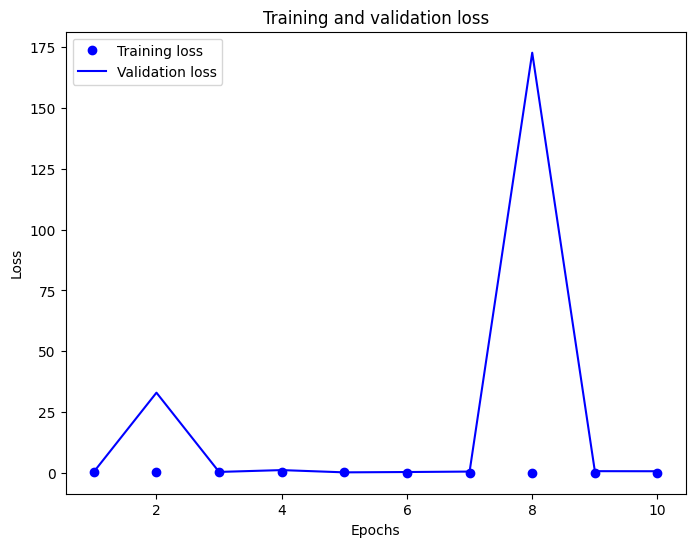

In [92]:
# Plot the loss curves for training and validation.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [93]:
# save the model
model.save('model.h5')


# load model and predict
model = tf.keras.models.load_model('model.h5')
# load the image
path='/Users/akshatsaxena/Desktop/BTP_VAD/BTP!/TRAIN/CLEAN/MST_9669812A.wav'
spectrogram=[]
y, sr = librosa.load(path, sr=None)
win_size = int(sr * 0.025)  # 25ms window size
hop_size = int(sr * 0.01)   # 10ms hop size
for i in range(0, len(y) - win_size + hop_size, hop_size):
    window = y[i:i+win_size]
    spec = librosa.stft(window, n_fft=win_size, hop_length=hop_size)
    spec_db = librosa.amplitude_to_db(abs(spec))
    spectrogram.append(spec_db)
folder='/Users/akshatsaxena/Desktop/BTP_VAD/BTP!/data/test/'
for i,spec in enumerate(spectrogram):
    # Create the plot using specshow()
    librosa.display.specshow(spec, sr=sr, hop_length=hop_size, x_axis='time', y_axis='linear')

    # Set the size of the plot in pixels
    figsize = (10, 6)
    fig = plt.gcf()
    fig.set_size_inches(figsize[0], figsize[1])

    filename = f'spec_{i}.png'
    #print(folder+label)

    # Save the plot as a PNG file in the appropriate folder with a DPI of 100
    plt.savefig(os.path.join(folder, filename), dpi=100)
    plt.close()



In [98]:
#read images from folder and resize them to 600, 1000, 3
folder='/Users/akshatsaxena/Desktop/BTP_VAD/test/'
images = []
for filename in os.listdir(folder):
    # img = Image.open(os.path.join(folder,filename))
    img = cv2.imread(os.path.join(folder,filename))
    # if img is not None:
        # img = img.resize((1000,600))
    img = np.array(img)
    images.append(img)
images = np.array(images)
images.shape


(324, 600, 1000, 3)

In [99]:
images[0].shape

(600, 1000, 3)

In [100]:
#resize to 256, 256, 3
images = tf.image.resize(images, [256, 256])
images.shape

TensorShape([324, 256, 256, 3])

11/11 [==============================] - 4s 327ms/step
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


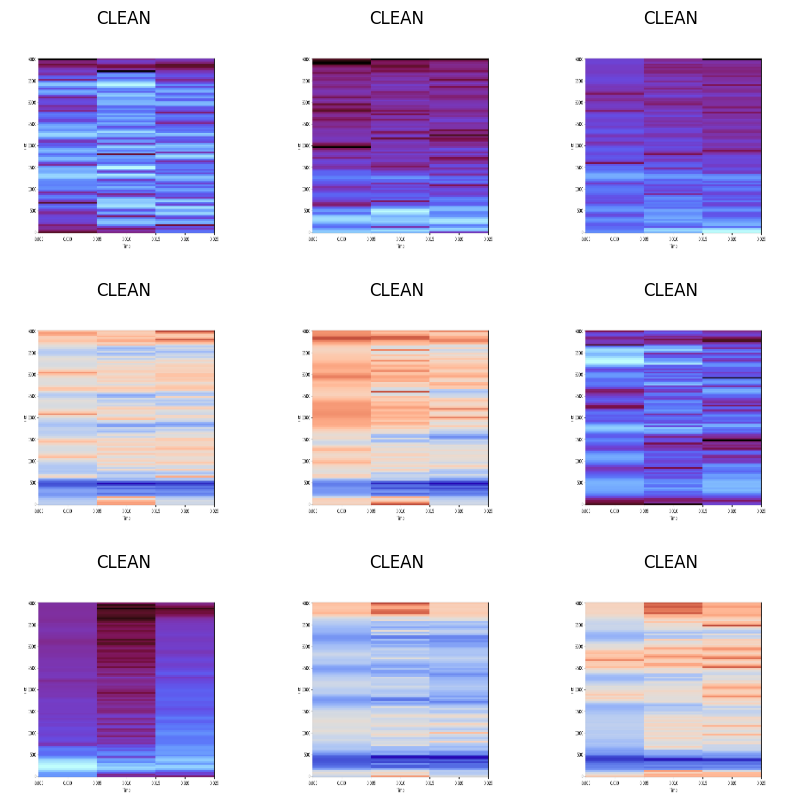

In [101]:
predictions = model.predict(images)
predictions = np.argmax(predictions, axis=1)
print(predictions)

class_names = ['NOISY', 'CLEAN']

# plot the predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")


In [102]:
folder='/Users/akshatsaxena/Desktop/BTP_VAD/BTP!/data/Class0/'
image=cv2.imread(folder+'spec_0.png')
image.shape

(600, 1000, 3)

In [103]:
image = tf.image.resize(image, [256, 256])
image.shape

TensorShape([256, 256, 3])

In [105]:
#reshape to 1, 256, 256, 3
image = np.reshape(image, (1, 256, 256, 3))
image.shape

(1, 256, 256, 3)

1/1 [==============================] - 0s 250ms/step
[1]


(-0.5, 255.5, 255.5, -0.5)

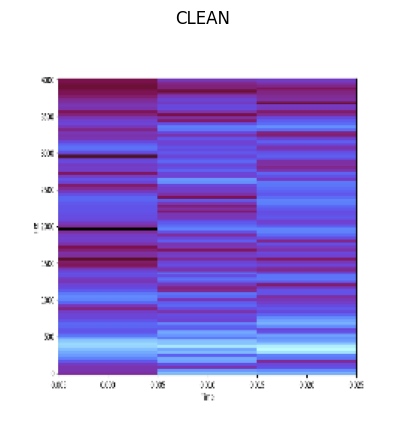

In [107]:
# predict 
predictions = model.predict(image)
predictions = np.argmax(predictions, axis=1)
print(predictions)

# plot the predictions
plt.figure(figsize=(5, 5))
plt.imshow(image.reshape(256, 256, 3).astype("uint8"))
plt.title(class_names[predictions[0]])
plt.axis("off")